In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [21]:
# Load the CSV file distances (Data aggregated for nucleos)
file_path = "C:/Users/vehico/Documents/Thesis/Distance-project/aggregated_school_distances_transit_weighted_ROMA_ok.csv"
df = pd.read_csv(file_path)
df.head(5)

,Comune,Nucleo_ID,Popolazione,SI_mean_km,SI_St.Dv_km,SI_mean_min,SI_St.Dv_min,SI_match_ratio,SP_mean_km,SP_St.Dv_km,SP_mean_min,SP_St.Dv_min,SP_match_ratio,SS_mean_km,SS_St.Dv_km,SS_mean_min,SS_St.Dv_min,SS_match_ratio
0,AFFILE,5.800110e+09,1297.0,0.119,NaN,1.466667,NaN,1/1,0.429,NaN,5.600000,NaN,1/1,0.429,NaN,5.600000,NaN,1/1
1,AFFILE,5.800127e+09,28.0,2.061,NaN,35.050000,NaN,1/1,2.338,NaN,38.616667,NaN,1/1,2.338,NaN,38.616667,NaN,1/1
2,AGOSTA,5.800210e+09,1010.0,0.259,NaN,5.000000,NaN,1/1,0.259,NaN,5.000000,NaN,1/1,0.242,NaN,4.783333,NaN,1/1
3,AGOSTA,5.800210e+09,389.0,3.833,NaN,19.966667,NaN,1/1,3.833,NaN,19.966667,NaN,1/1,3.810,NaN,19.650000,NaN,1/1
4,AGOSTA,5.800220e+09,142.0,1.829,NaN,11.716667,NaN,1/1,1.829,NaN,11.716667,NaN,1/1,1.806,NaN,11.400000,NaN,1/1


In [22]:
# Function to check whether a match_ratio is full (e.g. “1/1”)
def is_full_match(ratio):
    try:
        num, den = map(int, ratio.split('/'))
        if num == 0:
            return True
        else:
            return False
        
    except:
        return False  # nel caso ci sia NaN o un valore malformato

In [23]:
# Apply the function to each category
df["SI_full"] = df["SI_match_ratio"].apply(is_full_match)
df["SP_full"] = df["SP_match_ratio"].apply(is_full_match)
df["SS_full"] = df["SS_match_ratio"].apply(is_full_match)

In [24]:
# Filters out urban cores that do NOT have complete matches
nuclei_incompleti = df[df["SI_full"] | df["SP_full"] | df["SS_full"]]
nuclei_incompleti

,Comune,Nucleo_ID,Popolazione,SI_mean_km,SI_St.Dv_km,SI_mean_min,SI_St.Dv_min,SI_match_ratio,SP_mean_km,SP_St.Dv_km,...,SP_St.Dv_min,SP_match_ratio,SS_mean_km,SS_St.Dv_km,SS_mean_min,SS_St.Dv_min,SS_match_ratio,SI_full,SP_full,SS_full
70,CAPRANICA PRENESTINA,5.801910e+09,46.0,18.402,NaN,39.866667,NaN,1/1,NaN,NaN,...,NaN,0/1,NaN,NaN,NaN,NaN,0/1,False,True,True
102,CERVARA DI ROMA,5.802820e+09,82.0,NaN,NaN,NaN,NaN,0/1,NaN,NaN,...,NaN,0/1,NaN,NaN,NaN,NaN,0/1,True,True,True
107,CERVETERI,5.802910e+09,299.0,NaN,NaN,NaN,NaN,0/6,NaN,NaN,...,NaN,0/8,NaN,NaN,NaN,NaN,0/3,True,True,True
108,CERVETERI,5.802920e+09,179.0,NaN,NaN,NaN,NaN,0/6,NaN,NaN,...,NaN,0/8,NaN,NaN,NaN,NaN,0/3,True,True,True
119,CERVETERI,5.802927e+09,30.0,NaN,NaN,NaN,NaN,0/6,NaN,NaN,...,NaN,0/8,NaN,NaN,NaN,NaN,0/3,True,True,True
312,ROCCA DI PAPA,5.808610e+09,183.0,NaN,NaN,NaN,NaN,0/3,NaN,NaN,...,NaN,0/3,NaN,NaN,NaN,NaN,0/1,True,True,True


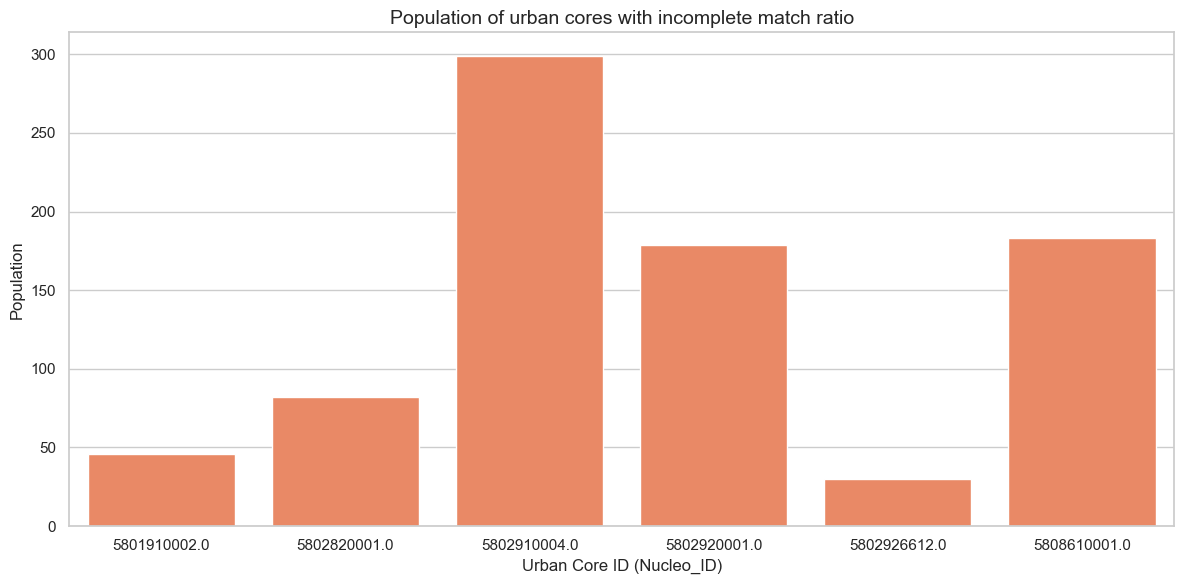

In [25]:
# Set plot style
sns.set(style="whitegrid")

# Sort by population descending
nuclei_incompleti_sorted = nuclei_incompleti.sort_values(by="Popolazione", ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=nuclei_incompleti_sorted,
    x="Nucleo_ID",
    y="Popolazione",
    color="coral"
)

plt.title("Population of urban cores with incomplete match ratio", fontsize=14)
plt.xlabel("Urban Core ID (Nucleo_ID)", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.tight_layout()
plt.show()

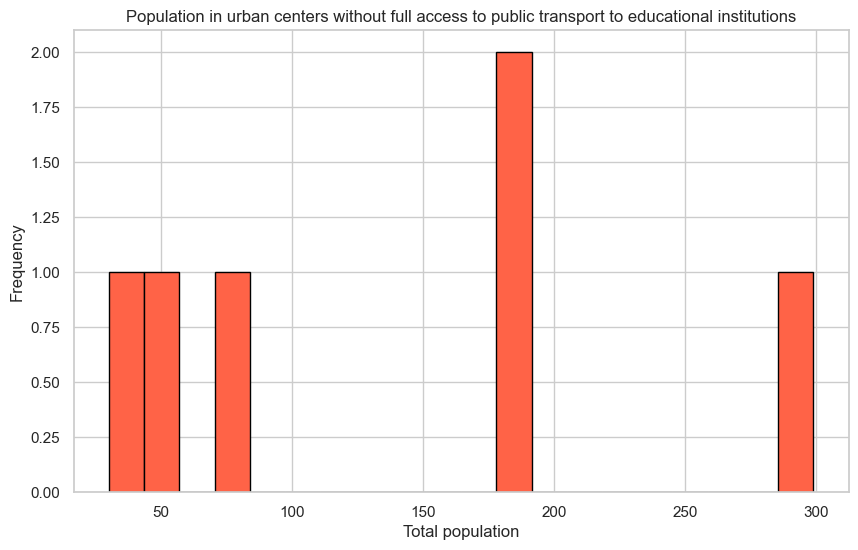

In [26]:
# Histogram of total population of the urban centers without public transport
plt.figure(figsize=(10, 6))
plt.hist(nuclei_incompleti["Popolazione"], bins=20, color='tomato', edgecolor='black')
plt.title("Population in urban centers without full access to public transport to educational institutions")
plt.xlabel("Total population")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [27]:
# Load the total population per municipality
df_comuni = pd.read_csv("C:/Users/vehico/Documents/Thesis/Distance-project/Raw_data_processing/Raw_data/DCIS_POPRES1_12022025124521891.csv")

# Clean column and adjust columns names
df_comuni.columns = df_comuni.columns.str.strip().str.replace('"', '')
df_comuni['Territorio'] = df_comuni['Territorio'].str.upper()

# Rename and keep only necessary columns
df_comuni = df_comuni.rename(columns={
    "Territorio": "Comune",
    "Value": "Popolazione_totale"
})[["Comune", "Popolazione_totale"]]

In [28]:
# Aggregate population with NA per Comune
pop_na_per_comune = nuclei_incompleti.groupby("Comune")["Popolazione"].sum().reset_index()
pop_na_per_comune = pop_na_per_comune.rename(columns={"Popolazione": "Popolazione_NA"})

In [29]:
# Merge with total population
df_risultato = pd.merge(df_comuni, pop_na_per_comune, on="Comune", how="left")
df_risultato["Popolazione_NA"] = df_risultato["Popolazione_NA"].fillna(0)

In [30]:
# Calculate the percentage
df_risultato["Perc_NA"] = (df_risultato["Popolazione_NA"] / df_risultato["Popolazione_totale"]) * 100

In [32]:
# Show the result
df_risultato = df_risultato.sort_values("Perc_NA", ascending=False)
df_risultato[["Comune", "Perc_NA", "Popolazione_NA", "Popolazione_totale"]].head(4)

,Comune,Perc_NA,Popolazione_NA,Popolazione_totale
93,CERVARA DI ROMA,17.672414,82.0,464
58,CAPRANICA PRENESTINA,14.465409,46.0,318
95,CERVETERI,1.337793,508.0,37973
256,ROCCA DI PAPA,1.036945,183.0,17648


In [33]:
# Filter only municipalities with percentage other than 0
df_risultato_filt = df_risultato[df_risultato["Perc_NA"] > 0]

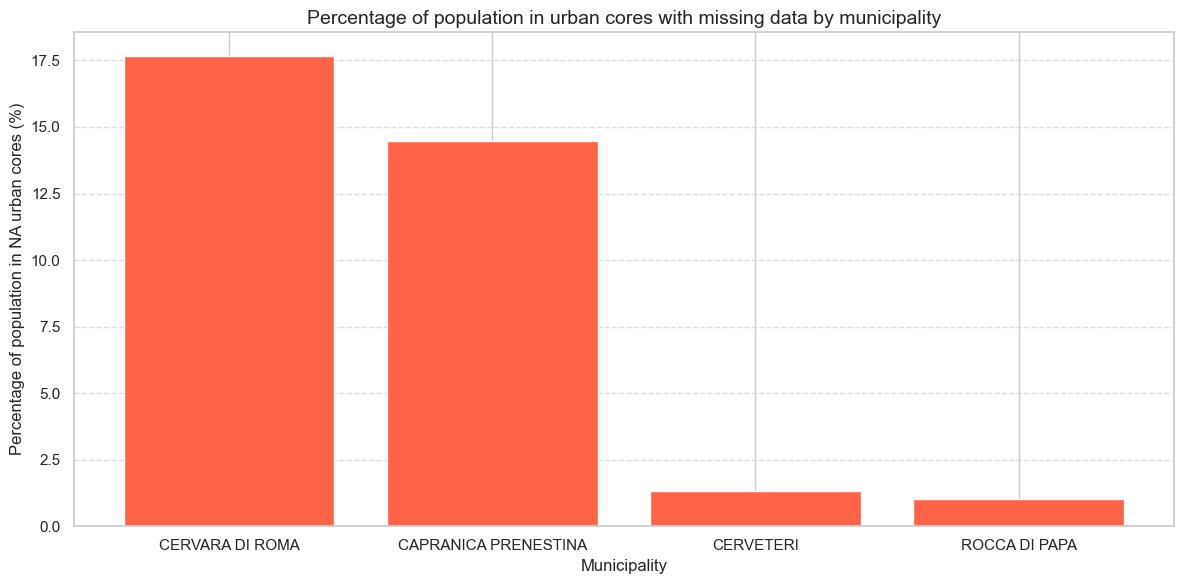

In [34]:
# Graph the weighted percentage by municipality
plt.figure(figsize=(12, 6))
bars = plt.bar(df_risultato_filt["Comune"], df_risultato_filt["Perc_NA"], color="tomato")
plt.title("Percentage of population in urban cores with missing data by municipality", fontsize=14)
plt.xlabel("Municipality", fontsize=12)
plt.ylabel("Percentage of population in NA urban cores (%)", fontsize=12)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Comparison of population of nuclei with and without NA

In [35]:
# Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(nuclei_incompleti['Popolazione'], df['Popolazione'])
print(f'Mann-Whitney U test: p-value = {p_value}')

Mann-Whitney U test: p-value = 0.20725135102481573


In [36]:
# Medians of the populations of the nuclei with and without NA

median_na = nuclei_incompleti['Popolazione'].median()
print(f'Median number of population cores with NA: {median_na}')

median_no_na = df['Popolazione'].median()
print(f'Median number of population cores without NA: {median_no_na}')

Median number of population cores with NA: 130.5
Median number of population cores without NA: 183.0


In [37]:
# Kolmogorov-Smirnov test
ks_stat, ks_p_value = stats.ks_2samp(nuclei_incompleti['Popolazione'], df['Popolazione'])
print(f'Kolmogorov-Smirnov test = {ks_p_value}')

Kolmogorov-Smirnov test = 0.22915006957730347


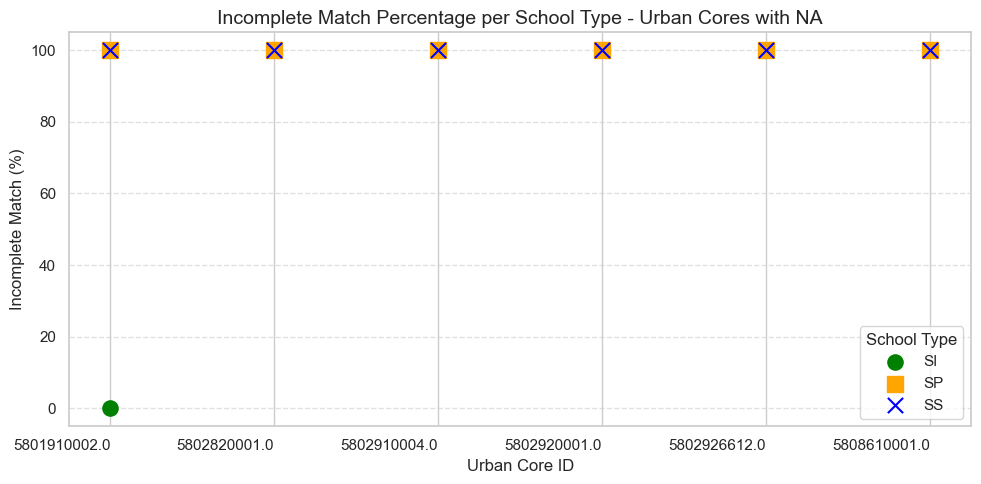

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Funzione per estrarre il numeratore e denominatore e calcolare la % incompleta
def estrai_percentuale_incompleta(ratio):
    if pd.isna(ratio) or "/" not in ratio:
        return 100  # Se manca del tutto lo consideriamo completamente incompleto
    num, denom = ratio.split("/")
    num, denom = int(num), int(denom)
    if denom == 0:
        return 100
    return 100 * (1 - num / denom)

nuclei_incompleti = nuclei_incompleti.copy()

# Applicare la funzione per ogni categoria
nuclei_incompleti["SI_percent_incomplete"] = nuclei_incompleti["SI_match_ratio"].apply(estrai_percentuale_incompleta)
nuclei_incompleti["SP_percent_incomplete"] = nuclei_incompleti["SP_match_ratio"].apply(estrai_percentuale_incompleta)
nuclei_incompleti["SS_percent_incomplete"] = nuclei_incompleti["SS_match_ratio"].apply(estrai_percentuale_incompleta)

# Aggiungi indice per l'asse X
nuclei_incompleti["index"] = range(len(nuclei_incompleti))

# Calcolo percentuali incomplete (esempio già calcolato)
# nuclei_incompleti["SI_percent_incomplete"] = ...
# nuclei_incompleti["SP_percent_incomplete"] = ...
# nuclei_incompleti["SS_percent_incomplete"] = ...

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(nuclei_incompleti["index"], nuclei_incompleti["SI_percent_incomplete"], label="SI", color="green", marker="o", s=120)
ax.scatter(nuclei_incompleti["index"], nuclei_incompleti["SP_percent_incomplete"], label="SP", color="orange", marker="s", s=120)
ax.scatter(nuclei_incompleti["index"], nuclei_incompleti["SS_percent_incomplete"], label="SS", color="blue", marker="x", s=120)

# Etichette asse X
ax.set_xticks(nuclei_incompleti["index"])
ax.set_xticklabels(nuclei_incompleti["Nucleo_ID"], ha="right")

# Titoli
ax.set_title("Incomplete Match Percentage per School Type - Urban Cores with NA", fontsize=14)
ax.set_xlabel("Urban Core ID", fontsize=12)
ax.set_ylabel("Incomplete Match (%)", fontsize=12)
ax.legend(title="School Type")

plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# Trying to impute different values for NaN

In [39]:
lambda_values = [1.1, 1.25, 1.5, 1.75, 2.0]

# Funzione di imputazione penalizzata
def imputazione_tempi_penalizzati(df, categoria, lamma):
    df = df.copy()
    col_target = f"{categoria}_mean_min"
    col_output = f"{categoria}_F1"

    df[col_output] = df.get(col_output, np.nan)

    # Calcolo Tmax per ciascun Comune
    t_max_dict = df.groupby("Comune")[col_target].max().to_dict()
    p_dict = df.groupby("Comune")[col_target].apply(lambda x: x.notna().mean()).to_dict()

    for idx, row in df.iterrows():
        val = row[col_target]
        comune = row['Comune']

        if pd.isna(val):
            T_max = t_max_dict.get(comune, np.nan)
            p = p_dict.get(comune, 0)

            if not np.isnan(T_max) and p > 0:
                si = row.get("SI_full", False)
                sp = row.get("SP_full", False)
                ss = row.get("SS_full", False)

                if si and sp and ss:
                    penalizzazione = 1
                else:
                    penalizzazione = 1.5

                imputato = T_max * (1 - p) * lamma * penalizzazione + T_max * p
                df.at[idx, col_output] = imputato
        else:
            df.at[idx, col_output] = val

    return df

# Wrapper per elaborare tutte le categorie
def wrapper_imputazione_multipla(df, categorie, lambda_values):
    risultati_finali = pd.DataFrame(index=df.index)

    for categoria in categorie:
        for lamma in lambda_values:
            df_imputato = imputazione_tempi_penalizzati(df, categoria, lamma)
            col_name = f"{categoria}_lambda_{lamma}"
            risultati_finali[col_name] = df_imputato[f"{categoria}_F1"]

        # Calcola la differenza tra colonne di lambda per ciascuna categoria
        col_lambda = [f"{categoria}_lambda_{l}" for l in lambda_values]
        risultati_finali[f'{categoria}_resta'] = risultati_finali[col_lambda].diff(axis=1).iloc[:, -1]
        risultati_finali = risultati_finali[risultati_finali[f'{categoria}_resta'] != 0]
        risultati_finali = risultati_finali.drop(columns=[f'{categoria}_resta'])

    return risultati_finali

In [40]:
categorie = ['SI', 'SP', 'SS']

df_risultati = wrapper_imputazione_multipla(df, categorie, lambda_values)

# Visualizza i primi risultati
df_risultati.head(5)

,SI_lambda_1.1,SI_lambda_1.25,SI_lambda_1.5,SI_lambda_1.75,SI_lambda_2.0,SP_lambda_1.1,SP_lambda_1.25,SP_lambda_1.5,SP_lambda_1.75,SP_lambda_2.0,SS_lambda_1.1,SS_lambda_1.25,SS_lambda_1.5,SS_lambda_1.75,SS_lambda_2.0
102,70.007500,72.568750,76.837500,81.106250,85.375000,73.321667,76.004167,80.475000,84.945833,89.416667,156.620000,162.350000,171.900000,181.450000,191.000000
107,187.352083,191.505208,198.427083,205.348958,212.270833,120.218292,122.883229,127.324792,131.766354,136.207917,186.269417,190.398542,197.280417,204.162292,211.044167
108,187.352083,191.505208,198.427083,205.348958,212.270833,120.218292,122.883229,127.324792,131.766354,136.207917,186.269417,190.398542,197.280417,204.162292,211.044167
119,187.352083,191.505208,198.427083,205.348958,212.270833,120.218292,122.883229,127.324792,131.766354,136.207917,186.269417,190.398542,197.280417,204.162292,211.044167
312,92.346806,95.725347,101.356250,106.987153,112.618056,92.284167,95.660417,101.287500,106.914583,112.541667,98.553750,102.159375,108.168750,114.178125,120.187500


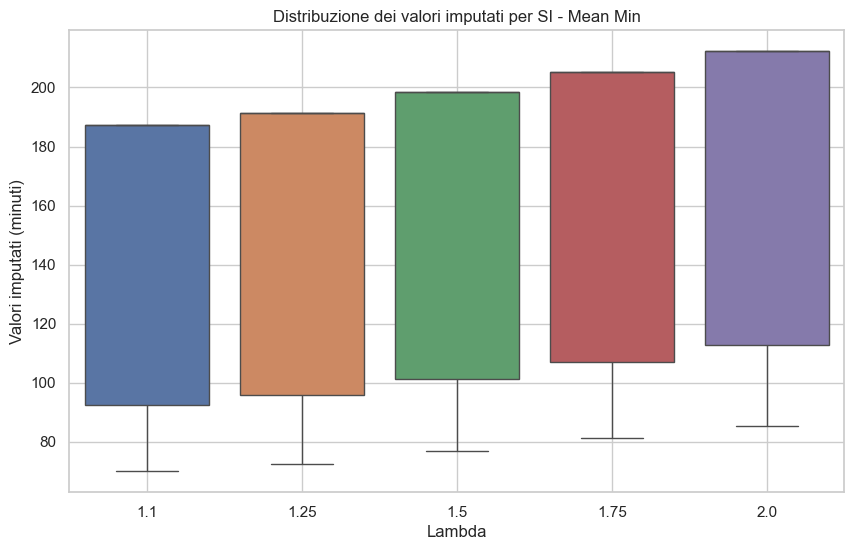

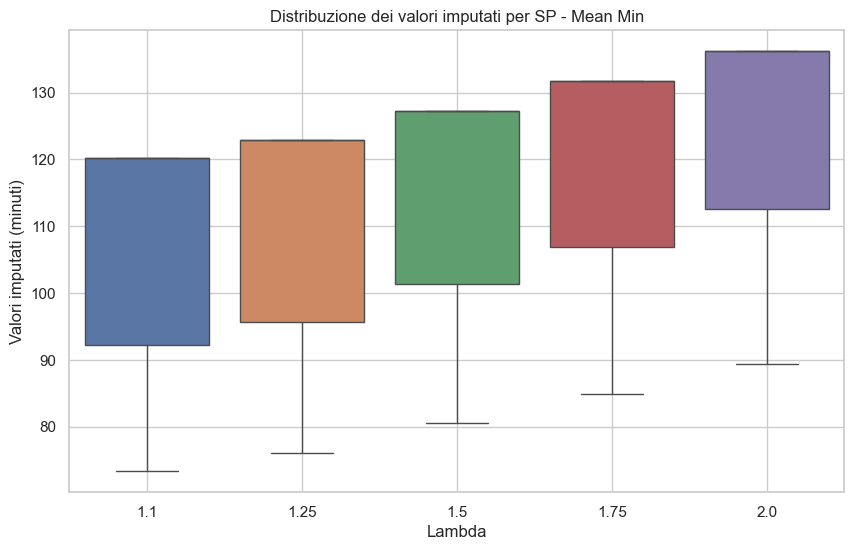

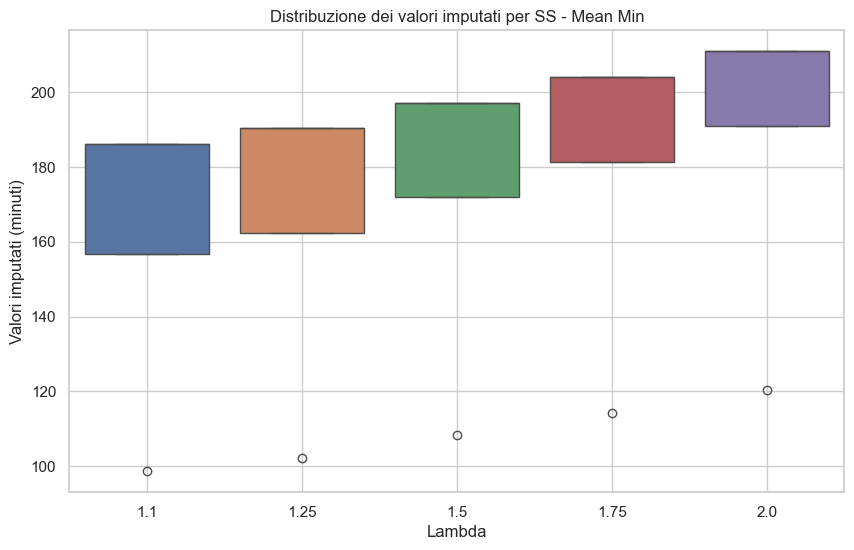

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizzazione con boxplot per ogni categoria
for cat in ['SI', 'SP', 'SS']:
    # Filtra solo le colonne relative alla categoria
    cat_cols = [col for col in df_risultati.columns if col.startswith(f"{cat}_lambda")]
    df_cat = df_risultati[cat_cols]

    # Crea il boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_cat)
    plt.title(f"Distribuzione dei valori imputati per {cat} - Mean Min")
    plt.xlabel("Lambda")
    plt.ylabel("Valori imputati (minuti)")
    plt.xticks(ticks=range(len(cat_cols)), labels=[col.split('_')[-1] for col in cat_cols])
    plt.grid(True)
    plt.show()


In [42]:

def calcola_media_ponderata_municipio(df_risultati, df_info_base, categoria):
    lambda_cols = [col for col in df_risultati.columns if col.startswith(f"{categoria}_lambda")]

    df_merge = pd.concat([
        df_info_base[['Nucleo_ID', 'Comune', 'Popolazione']],
        df_risultati[lambda_cols]
    ], axis=1)

    df_merge = df_merge.dropna(subset=['Popolazione'])

    media_ponderata = {}
    for col in lambda_cols:
        def media(gruppo):
            if 'Comune' in gruppo.columns:
                gruppo = gruppo.drop(columns='Comune')
            gruppo_validi = gruppo.dropna(subset=[col])
            if len(gruppo_validi) == 0:
                return np.nan
            return np.average(gruppo_validi[col], weights=gruppo_validi["Popolazione"])

        grouped = df_merge.groupby("Comune").apply(media)
        media_ponderata[col] = grouped

    df_media_ponderata = pd.DataFrame(media_ponderata).reset_index()
    return df_media_ponderata

In [49]:
df_media_SI = calcola_media_ponderata_municipio(df_risultati, df, categoria='SI')
df_media_SI_filtrato = df_media_SI[df_media_SI.drop(columns="Comune").notna().any(axis=1)]
df_media_SI_filtrato

C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_merge.groupby("Comune").apply(media)
C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_merge.groupby("Comune").apply(media)
C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWar

,Comune,SI_lambda_1.1,SI_lambda_1.25,SI_lambda_1.5,SI_lambda_1.75,SI_lambda_2.0
26,CERVARA DI ROMA,70.007500,72.568750,76.837500,81.106250,85.375000
27,CERVETERI,187.352083,191.505208,198.427083,205.348958,212.270833
81,ROCCA DI PAPA,92.346806,95.725347,101.356250,106.987153,112.618056


In [50]:
df_media_SP = calcola_media_ponderata_municipio(df_risultati, df, categoria='SP')
df_media_SP_filtrato = df_media_SP[df_media_SP.drop(columns="Comune").notna().any(axis=1)]
df_media_SP_filtrato

C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_merge.groupby("Comune").apply(media)
C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_merge.groupby("Comune").apply(media)
C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWar

,Comune,SP_lambda_1.1,SP_lambda_1.25,SP_lambda_1.5,SP_lambda_1.75,SP_lambda_2.0
26,CERVARA DI ROMA,73.321667,76.004167,80.475000,84.945833,89.416667
27,CERVETERI,120.218292,122.883229,127.324792,131.766354,136.207917
81,ROCCA DI PAPA,92.284167,95.660417,101.287500,106.914583,112.541667


In [51]:
df_media_SS = calcola_media_ponderata_municipio(df_risultati, df, categoria='SS')
df_media_SS_filtrato = df_media_SS[df_media_SS.drop(columns="Comune").notna().any(axis=1)]
df_media_SS_filtrato

C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_merge.groupby("Comune").apply(media)
C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_merge.groupby("Comune").apply(media)
C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\2186878259.py:21: DeprecationWar

,Comune,SS_lambda_1.1,SS_lambda_1.25,SS_lambda_1.5,SS_lambda_1.75,SS_lambda_2.0
26,CERVARA DI ROMA,156.620000,162.350000,171.900000,181.450000,191.000000
27,CERVETERI,186.269417,190.398542,197.280417,204.162292,211.044167
81,ROCCA DI PAPA,98.553750,102.159375,108.168750,114.178125,120.187500


In [52]:
def crea_tabella_riassuntiva(df_base, df_risultati, categoria, lambda_target):
    """
    Crea una tabella riassuntiva per una certa categoria e valore di lambda.
    
    df_base: dataframe originale con colonne Comune, Nucleo_ID, Popolazione
    df_risultati: dataframe con colonne tipo SI_lambda_1.1, SP_lambda_1.25, ecc.
    categoria: es. "SI"
    lambda_target: es. 1.5
    """
    colonna_lambda = f"{categoria}_lambda_{lambda_target}"

    # Step 1: merge tra info base e risultati
    df_merge = pd.concat([
    df_base[['Nucleo_ID', 'Comune', 'Popolazione']],
    df_risultati[colonna_lambda]
], axis=1)

    # Step 2: flag se il valore è imputato o meno
    df_merge['Imputato'] = df_merge[colonna_lambda].notna()

    # Step 3: calcolo per Comune
    grouped = df_merge.groupby('Comune').agg(
        Nuclei_totali=('Nucleo_ID', 'count'),
        Nuclei_imputati=('Imputato', 'sum'),
        Popolazione_totale=('Popolazione', 'sum')
    )

    grouped['%_Imputati'] = grouped['Nuclei_imputati'] / grouped['Nuclei_totali'] * 100

    # Step 4: media ponderata solo dove imputato
    def media_ponderata(gruppo):
        gruppo_validi = gruppo.dropna(subset=[colonna_lambda])
        if len(gruppo_validi) == 0:
            return np.nan
        return np.average(gruppo_validi[colonna_lambda], weights=gruppo_validi['Popolazione'])

    media_dict = df_merge.groupby('Comune').apply(media_ponderata).to_dict()
    grouped['Media_ponderata'] = grouped.index.map(media_dict)

    return grouped.reset_index()


In [53]:
df_riassunto_SI = crea_tabella_riassuntiva(df, df_risultati, categoria='SI', lambda_target=1.5)
df_riassunto_SI = df_riassunto_SI[df_riassunto_SI['%_Imputati'] > 0]
df_riassunto_SI.head(10)

C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\652804897.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  media_dict = df_merge.groupby('Comune').apply(media_ponderata).to_dict()


,Comune,Nuclei_totali,Nuclei_imputati,Popolazione_totale,%_Imputati,Media_ponderata
26,CERVARA DI ROMA,4,1,347.0,25.0,76.837500
27,CERVETERI,20,3,31366.0,15.0,198.427083
81,ROCCA DI PAPA,4,1,17111.0,25.0,101.356250


In [54]:
df_riassunto_SP = crea_tabella_riassuntiva(df, df_risultati, categoria='SP', lambda_target=1.5)
df_riassunto_SP = df_riassunto_SP[df_riassunto_SP['%_Imputati'] > 0]
df_riassunto_SP.head(10)

C:\Users\vehico\AppData\Local\Temp\ipykernel_9256\652804897.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  media_dict = df_merge.groupby('Comune').apply(media_ponderata).to_dict()


,Comune,Nuclei_totali,Nuclei_imputati,Popolazione_totale,%_Imputati,Media_ponderata
26,CERVARA DI ROMA,4,1,347.0,25.0,80.475000
27,CERVETERI,20,3,31366.0,15.0,127.324792
81,ROCCA DI PAPA,4,1,17111.0,25.0,101.287500


In [117]:
df_riassunto_SS = crea_tabella_riassuntiva(df, df_risultati, categoria='SS', lambda_target=1.5)
df_riassunto_SS = df_riassunto_SS[df_riassunto_SS['%_Imputati'] > 0]
df_riassunto_SS.head(10)

C:\Users\vehico\AppData\Local\Temp\ipykernel_2136\652804897.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  media_dict = df_merge.groupby('Comune').apply(media_ponderata).to_dict()


,Comune,Nuclei_totali,Nuclei_imputati,Popolazione_totale,%_Imputati,Media_ponderata
26,CERVARA DI ROMA,4,1,347.0,25.0,162.356250
80,ROCCA DI PAPA,4,1,17111.0,25.0,131.446875


In [55]:
df_media_SI['School Type'] = 'SI'
df_media_SP['School Type'] = 'SP'
df_media_SS['School Type'] = 'SS'

df_media_all = pd.concat([df_media_SI, df_media_SP, df_media_SS])

df_melted = df_media_all.melt(
    id_vars=['Comune', 'School Type'],
    var_name='Lambda',
    value_name='Imputed Travel Time (min)'
)

df_melted['Lambda'] = df_melted['Lambda'].str.extract(r'lambda_([\d.]+)').astype(float)
df_lambda15 = df_melted[df_melted['Lambda'] == 1.5]
df_lambda15_filtrato = df_lambda15[df_lambda15['Imputed Travel Time (min)'].notna()]

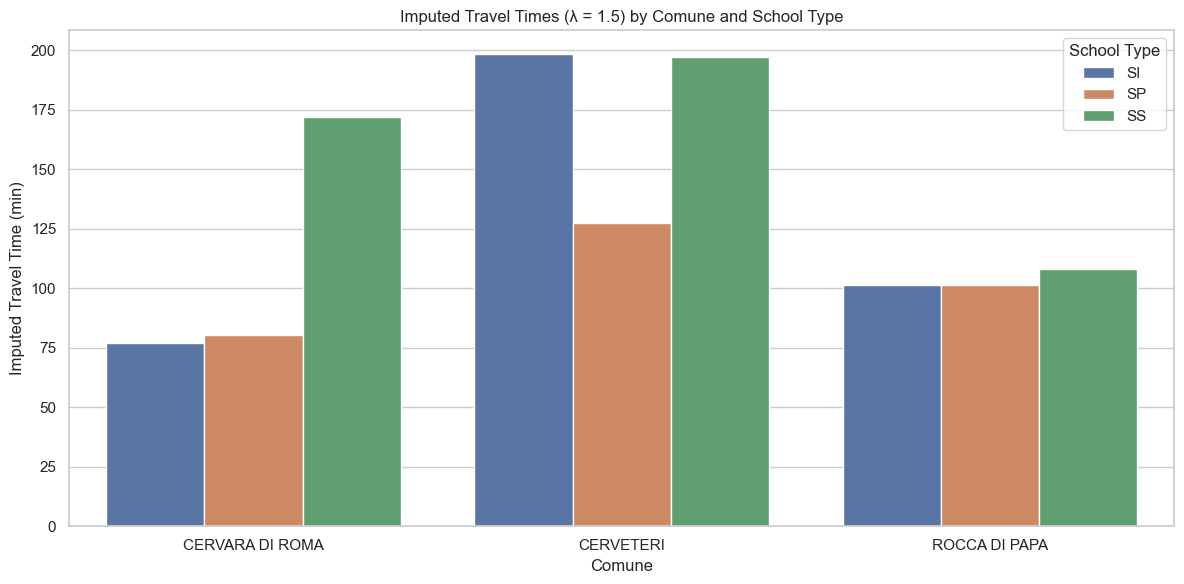

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_lambda15_filtrato, 
            x='Comune', 
            y='Imputed Travel Time (min)', 
            hue='School Type')

plt.title('Imputed Travel Times (λ = 1.5) by Comune and School Type')
plt.tight_layout()
plt.show()